<a href="https://colab.research.google.com/github/amaziarczyk/Projects/blob/master/Regresja_liniowa%2C_a_wielomianowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Porównanie modelu regresji prostej i wielomianowej

a) Model liniowy

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [148]:
# wygenerowanie danych
X=np.arange(-10,20,2)
noise=80*np.random.rand(15)
y=-X**3+10*X**2-2*X+3+noise
X=X.reshape(15,1)

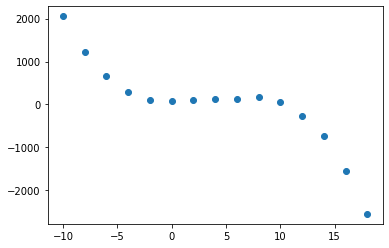

In [149]:
# sprawdzam jak wyglądają dane
plt.figure(figsize=(6,4))
plt.scatter(X,y)

In [123]:
#import regresji liniowej
from sklearn.linear_model import LinearRegression

In [150]:
# sprawdzam dopasowanie modelu
regressor=LinearRegression()
regressor.fit(X,y)
y_pred_lin=regressor.predict(X)
regressor.score(X,y)

0.7563561392275382

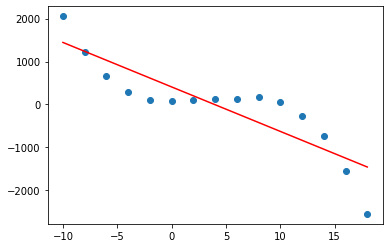

In [151]:
# wizualna prezentacja dopasowania modelu liniowego
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X,y_pred_lin, c="red")

b) Model wielomianowy


      - sposób I- ręczne wstawienie x^2

In [156]:
# tworze Data Frame ze zmienną stopnia 2 (x^2)
df=pd.DataFrame(data=X)
df.columns=['x']
df['x^2']=df['x']**2
df['1']=1
df.head()

,x,x^2,1
0,-10,100,1
1,-8,64,1
2,-6,36,1
3,-4,16,1
4,-2,4,1


In [158]:
# sprawdzam dopasowanie modelu
regressor_2=LinearRegression()
regressor_2.fit(df,y)
y_pred_3=regressor_2.predict(df)
regressor_2.score(df,y)

0.7730452005681923

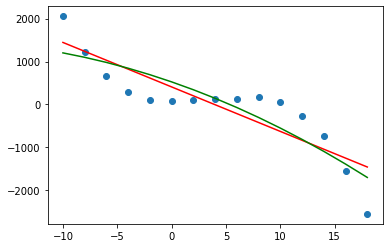

In [159]:
# porównuję modelliniowy (czerwony) i model wielomianowy (zielony)
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X,y_pred_lin, c="red")
plt.plot(X,y_pred_3, c="green")

      -II sposób - sklearn

In [160]:
# import biblioteki
from sklearn.preprocessing import PolynomialFeatures


In [161]:
# tworzeę wielomian
polynomial=PolynomialFeatures()
X_polynomial= polynomial.fit_transform(X)

In [ ]:
# Zmienne: X_polynomial i y

In [163]:
# sprawdzam jak wyglądają dane
df_polynomial=pd.DataFrame(data=X_polynomial)
df_polynomial.columns=['1','x','x^2']
df_polynomial.head()

,1,x,x^2
0,1.0,-10.0,100.0
1,1.0,-8.0,64.0
2,1.0,-6.0,36.0
3,1.0,-4.0,16.0
4,1.0,-2.0,4.0


In [165]:
#import bibioteki - model liniowy
from sklearn.linear_model import LinearRegression


In [167]:
regressor_polynomial=LinearRegression()
regressor_polynomial.fit(X_polynomial,y)
y_pred_wiel =regressor_polynomial.predict(X_polynomial)
regressor_polynomial.score(X_polynomial,y)

0.7730452005681923

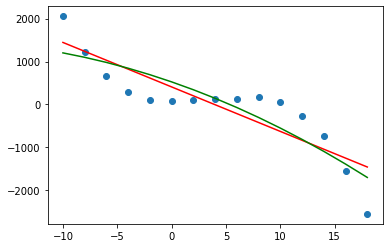

In [168]:
# porównuję model liniowy (czerwony) i wielomianowy (zielony)
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X,y_pred_lin, c="red")
plt.plot(X,y_pred_wiel, c="green")

In [ ]:
# model wielomianowy lepiej dopasował się do danych z R2=77%